In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [58]:
data=pd.read_csv("Avm_Musterileri.csv")

In [59]:
data.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


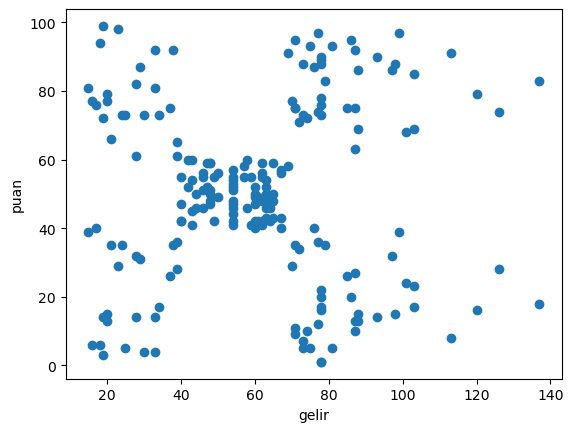

In [60]:
plt.scatter(data["Annual Income (k$)"],data ["Spending Score (1-100)"])
plt.xlabel("gelir")
plt.ylabel("puan")
plt.show()

In [61]:
scaler=MinMaxScaler()

In [62]:
scaler.fit(data[["Annual Income (k$)"]])
data["Annual Income (k$)"]=scaler.transform(data[["Annual Income (k$)"]])

In [63]:
scaler.fit(data[["Spending Score (1-100)"]])
data["Spending Score (1-100)"] = scaler.transform(data[["Spending Score (1-100)"]])

In [64]:
data.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,0.000000,0.387755
1,2,0.000000,0.816327
2,3,0.008197,0.051020
3,4,0.008197,0.775510
4,5,0.016393,0.397959


In [65]:
from sklearn.cluster import KMeans

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

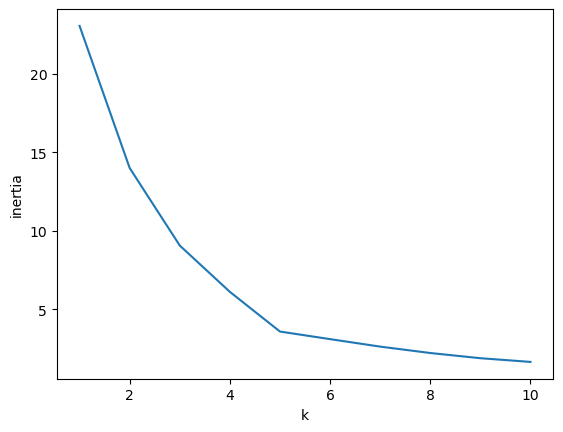

In [66]:
dirsek = range(1, 11)  
liste = []  

for k in dirsek:
    km = KMeans(n_clusters=k)  
    km.fit(data[["Annual Income (k$)", "Spending Score (1-100)"]])  
    liste.append(km.inertia_) 

plt.xlabel("k")
plt.ylabel("inertia")
plt.plot(dirsek, liste)
plt.show()



In [67]:
kson=KMeans(n_clusters=5)
y_pred=kson.fit_predict(data[["Annual Income (k$)","Spending Score (1-100)"]])
y_pred

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [68]:
data["cluster"]=y_pred

In [69]:
data.head()

,CustomerID,Annual Income (k$),Spending Score (1-100),cluster
0,1,0.000000,0.387755,4
1,2,0.000000,0.816327,3
2,3,0.008197,0.051020,4
3,4,0.008197,0.775510,3
4,5,0.016393,0.397959,4


In [70]:
kson.cluster_centers_

array([[0.6       , 0.16443149],
       [0.32866853, 0.49340468],
       [0.58638083, 0.82783883],
       [0.08792846, 0.79962894],
       [0.08792846, 0.19619666]])

In [72]:
data1=data[data.cluster==0]
data2=data[data.cluster==1]
data3=data[data.cluster==2]
data4=data[data.cluster==3]
data5=data[data.cluster==4]

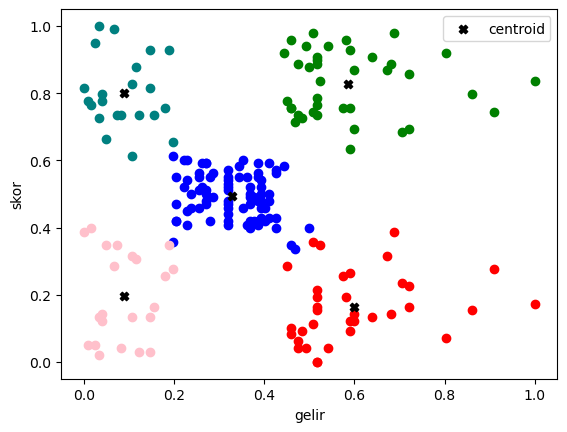

In [73]:
plt.xlabel("gelir")
plt.ylabel("skor")

# Farklı kümeler için scatter plot'ları
plt.scatter(data1["Annual Income (k$)"], data1["Spending Score (1-100)"], color="red")
plt.scatter(data2["Annual Income (k$)"], data2["Spending Score (1-100)"], color="blue")
plt.scatter(data3["Annual Income (k$)"], data3["Spending Score (1-100)"], color="green")
plt.scatter(data4["Annual Income (k$)"], data4["Spending Score (1-100)"], color="teal")
plt.scatter(data5["Annual Income (k$)"], data5["Spending Score (1-100)"], color="pink")

# K-means merkezlerini göstermek için scatter plot
plt.scatter(kson.cluster_centers_[:, 0], kson.cluster_centers_[:, 1], color="black", marker="X", label="centroid")

plt.legend()
plt.show()
